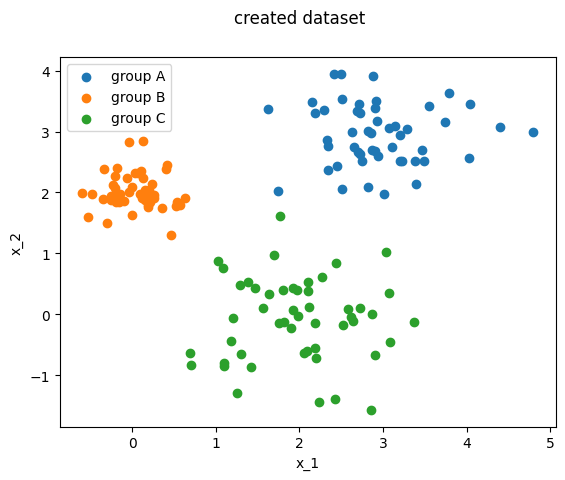

torch.Size([2, 150])
torch.Size([150])
il y a au total : 30 mini tensors contenant chacun 5 echantillons


In [15]:
from GenerateData import GenerateData
from torch.utils.data import DataLoader

# get a homemade dataset
train_ds = GenerateData()

# utilisation du module DataLoader pour séparer le dataset en plusieurs morceaux (batch size)
# en fait train_dl sépare le tensor en plusieur tensor de bs lignes. train_dl est donc une liste de tensor 
bs = 5
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True) 
print(f'il y a au total : {len(train_dl)} mini tensors contenant chacun {bs} echantillons')




Now that we have the dataset we will construct the neural network

###### 1) Declaration de la fonction de cout

In [16]:
import torch.nn.functional as F              # all the functions defined by torch

loss_fun = F.cross_entropy

###### 2) construction du reseau de neurones

In [17]:
from torch import nn
import torch

class reseau_neurones_1couche(nn.Module):           # création de la classe "reseau_neurones" fille de la classe nn.Module
    def __init__(self):
        super().__init__()                          # appel du constructeur de la classe parent 
        self.couche1 = nn.Linear(2,3)               # 3 neurones avec des entrées 2D
        print(self.couche1.weight.dtype)
    
    ## taches réalisées lorsque la fonction "reseau_neurones" est appelée 
    def forward(self, xb):
        xb = xb.to(torch.float32)                   # Pytorch exige que les données d'entrées soient du même type que les éléments de la matrice weight
        return self.couche1(xb)                     # sortie après passage des données au travers de la couche "couche1"


model = reseau_neurones_1couche()                   # instanciation d'un objet reseau de neurones
model.parameters


torch.float32


<bound method Module.parameters of reseau_neurones_1couche(
  (couche1): Linear(in_features=2, out_features=3, bias=True)
)>

In [18]:
from torch import optim 
import numpy as np

alpha = 1e-4
optimizer = torch.optim.SGD(model.parameters(),lr = alpha)

nb_it = 100
cost = np.empty(nb_it)

for i in range(nb_it):                             # pour chaque iteration

    for xb,yb in train_dl:                         # pour tous les échantillons

        # forward step
        y_pred = model(xb)

        #print (y_pred, yb)

        # loss computation
        yb = yb.flatten()
        yb = yb.type(torch.LongTensor)

        J = loss_fun(y_pred, yb)

        with torch.no_grad():                # disable the gradient computation tracking 
            cost[i] = J

        # compute the gradient
        J.backward()
        
        # optimize the gradient
        optimizer.step()

        # cleaning the gradient 
        optimizer.zero_grad()                       # same as model.zero_grad()                  
        
        

IndexError: Target 3 is out of bounds.